Directly download the dataset from kaggle using api

In [8]:
from google.colab import files
files.upload()

Saving flowers_recognition_(3).ipynb to flowers_recognition_(3).ipynb


{'flowers_recognition_(3).ipynb': b'{\n  "nbformat": 4,\n  "nbformat_minor": 0,\n  "metadata": {\n    "colab": {\n      "provenance": []\n    },\n    "kernelspec": {\n      "name": "python3",\n      "display_name": "Python 3"\n    },\n    "accelerator": "GPU"\n  },\n  "cells": [\n    {\n      "cell_type": "markdown",\n      "metadata": {\n        "id": "f-WMG1VUpm-x"\n      },\n      "source": [\n        "Directly download the dataset from kaggle using api"\n      ]\n    },\n    {\n      "cell_type": "code",\n      "metadata": {\n        "id": "0iFktKOOpN1z",\n        "colab": {\n          "resources": {\n            "http://localhost:8080/nbextensions/google.colab/files.js": {\n              "data": "Ly8gQ29weXJpZ2h0IDIwMTcgR29vZ2xlIExMQwovLwovLyBMaWNlbnNlZCB1bmRlciB0aGUgQXBhY2hlIExpY2Vuc2UsIFZlcnNpb24gMi4wICh0aGUgIkxpY2Vuc2UiKTsKLy8geW91IG1heSBub3QgdXNlIHRoaXMgZmlsZSBleGNlcHQgaW4gY29tcGxpYW5jZSB3aXRoIHRoZSBMaWNlbnNlLgovLyBZb3UgbWF5IG9idGFpbiBhIGNvcHkgb2YgdGhlIExpY2Vuc2UgYXQKLy8KLy8gI

In [18]:
! pip install -q kaggle

In [21]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [22]:
! chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 99% 223M/225M [00:12<00:00, 21.9MB/s]
100% 225M/225M [00:12<00:00, 19.3MB/s]


In [24]:
!ls -lrth

total 228M
-rw-r--r-- 1 root root 225M Jul 16  2021  flowers-recognition.zip
drwxr-xr-x 1 root root 4.0K Aug 10 19:19  sample_data
-rw-r--r-- 1 root root 2.5M Aug 14 14:58 'flowers_recognition_(3).ipynb'
-rw-r--r-- 1 root root   70 Aug 14 15:03  kaggle.json


!unzipping the flower dataset

In [25]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  i

In [26]:
!ls -lrth flowers/
# !mv flowers/flowers/ content/
# !ls -lrth content/flowers

total 244K
drwxr-xr-x 2 root root 40K Aug 14 15:03 daisy
drwxr-xr-x 2 root root 64K Aug 14 15:03 dandelion
drwxr-xr-x 2 root root 44K Aug 14 15:03 rose
drwxr-xr-x 2 root root 36K Aug 14 15:03 sunflower
drwxr-xr-x 2 root root 60K Aug 14 15:03 tulip


The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.notebook import tqdm
import os
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# from



Declaring local varibles to be used in this process

In [28]:
imgs_path='flowers/'
img_size=224
batch_size=32


**Data preprocessing -1
this way we can get better accuracy as we r converting images into array and preprocessing images and feeding to the neural networks as numerical data**

In [29]:
labels = ['dandelion', 'daisy','tulip','sunflower','rose']

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [30]:
data = get_data(imgs_path)

<ipython-input-29-f937c98719e0>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [34]:
l = []
for i in data:
    l.append(labels[i[1]])

The dataset seems balanced as for each training label , enough training examples exist



Randomly Previewing first 10 images



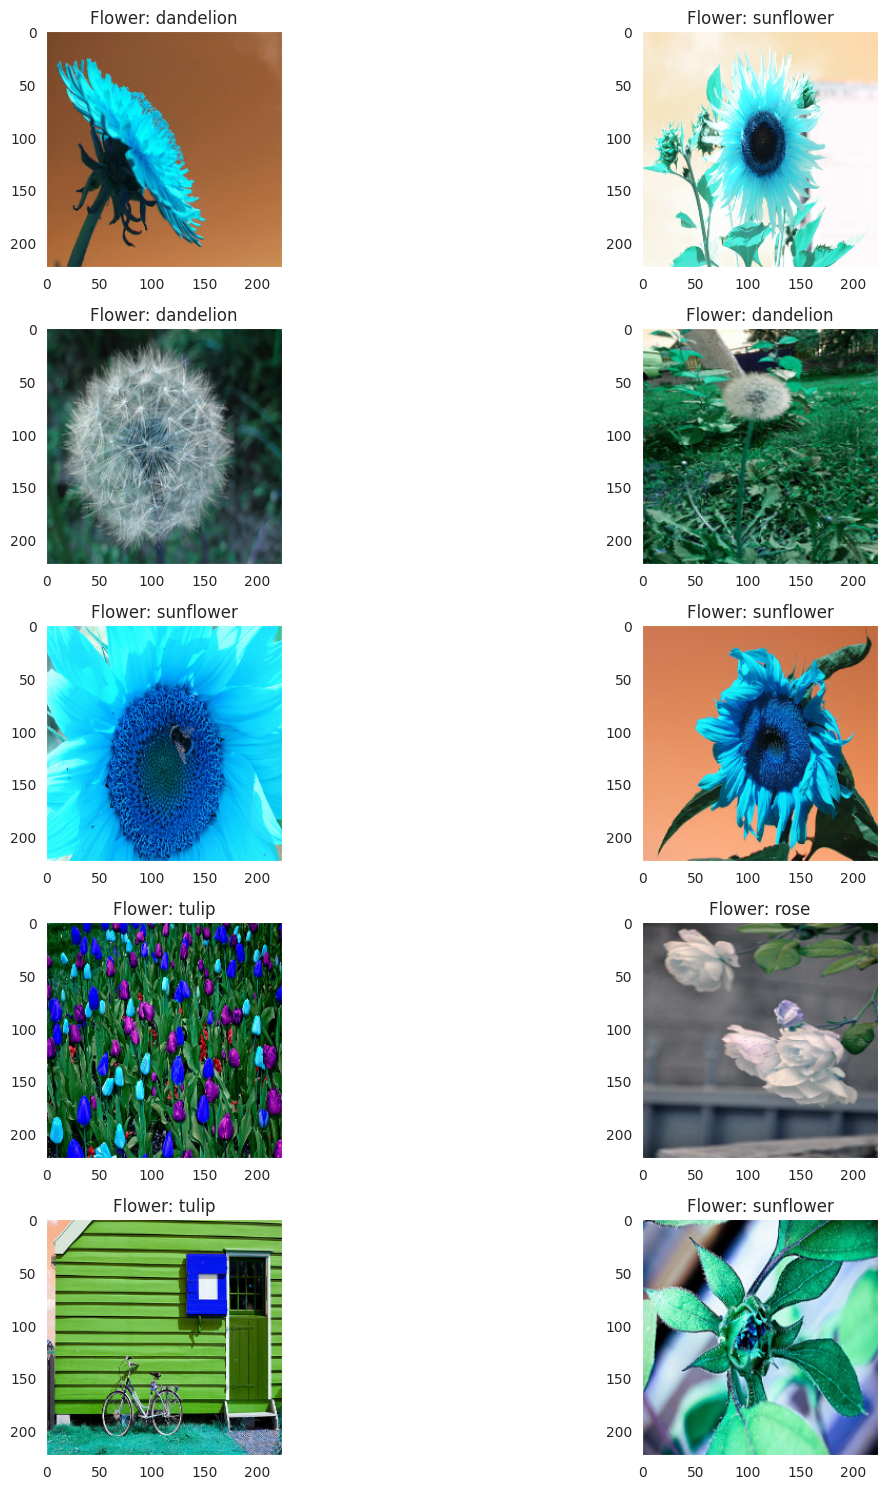

In [35]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])

plt.tight_layout()

In [36]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [37]:
# Normalize the data
# from keras.applications.vgg16 import preproces
from tensorflow.keras.applications.xception import Xception,preprocess_input
x = np.array(x)
x=preprocess_input(x)
x[0]

array([[[-0.99215686, -0.69411767, -0.7411765 ],
        [-0.8352941 , -0.84313726, -0.8509804 ],
        [-0.8745098 , -0.5294118 , -0.6392157 ],
        ...,
        [-0.9372549 , -0.75686276, -0.67058825],
        [-0.8509804 , -0.6313726 , -0.5764706 ],
        [-0.7490196 , -0.6156863 , -0.54509807]],

       [[-0.9607843 , -0.5137255 , -0.7019608 ],
        [-0.79607844, -0.6862745 , -0.78039217],
        [-0.70980394, -0.62352943, -0.6392157 ],
        ...,
        [-0.67058825, -0.52156866, -0.45098037],
        [-0.88235295, -0.70980394, -0.654902  ],
        [-0.8745098 , -0.73333335, -0.67058825]],

       [[-0.88235295, -0.6       , -0.7647059 ],
        [-0.81960785, -0.6627451 , -0.6862745 ],
        [-0.5921569 , -0.5137255 , -0.4823529 ],
        ...,
        [-0.6784314 , -0.58431375, -0.5372549 ],
        [-0.9372549 , -0.85882354, -0.8117647 ],
        [-0.75686276, -0.6156863 , -0.5529412 ]],

       ...,

       [[-0.9137255 , -0.8117647 , -0.7882353 ],
        [-0

In [38]:
x.shape

(4317, 224, 224, 3)

In [39]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
print(f' X_Train shape is {x_train.shape}, y_train shape is {y_train.shape}')
print(f' X_test shape is {x_test.shape}, y_test shape is {y_test.shape}')

 X_Train shape is (3453, 224, 224, 3), y_train shape is (3453, 5)
 X_test shape is (864, 224, 224, 3), y_test shape is (864, 5)


In [41]:
del x,y,data

In [42]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Model
from tensorflow.keras.layers import MaxPool2D,Dense,Flatten,Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential


pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
        layer.trainable = False

model=Sequential()
model.add(pre_trained_model)
model.add(MaxPool2D((2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
'''model = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])'''

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



80134624/80134624 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 5)                 23045     
                                                                 
Total params: 20,047,429
Trainable params: 4,742,661
Non-trainable params: 15,304,768
_________________________________________________________________


In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 3)
callbacks_list=[learning_rate,cb_early_stop]

In [44]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=8,batch_size=64,callbacks=[callbacks_list])

Epoch 1/8
54/54 [==============================] - 53s 620ms/step - loss: 0.8244 - accuracy: 0.7003 - val_loss: 0.5406 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 2/8
54/54 [==============================] - 21s 396ms/step - loss: 0.3070 - accuracy: 0.8900 - val_loss: 0.4356 - val_accuracy: 0.8495 - lr: 0.0010
Epoch 3/8
54/54 [==============================] - 22s 404ms/step - loss: 0.1697 - accuracy: 0.9418 - val_loss: 0.4411 - val_accuracy: 0.8576 - lr: 0.0010
Epoch 4/8
54/54 [==============================] - 22s 409ms/step - loss: 0.0950 - accuracy: 0.9690 - val_loss: 0.4664 - val_accuracy: 0.8519 - lr: 0.0010
Epoch 5/8
54/54 [==============================] - 22s 403ms/step - loss: 0.0502 - accuracy: 0.9870 - val_loss: 0.5098 - val_accuracy: 0.8646 - lr: 0.0010


In [45]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

27/27 [==============================] - 4s 144ms/step - loss: 0.5098 - accuracy: 0.8646
Accuracy of the model is -  86.45833134651184 %


Text(0.5, 1.0, 'val accuracy')

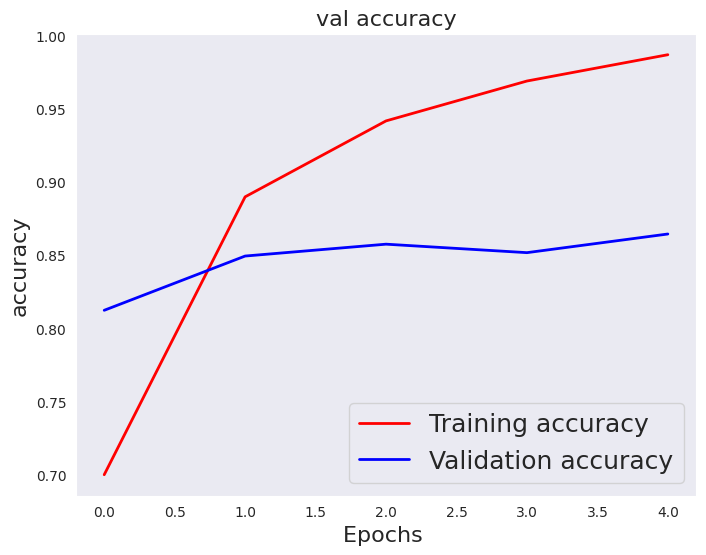

In [46]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [47]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

27/27 [==============================] - 5s 163ms/step


In [49]:
class_names=os.listdir(imgs_path)

Accuracy : 86.45833333333334


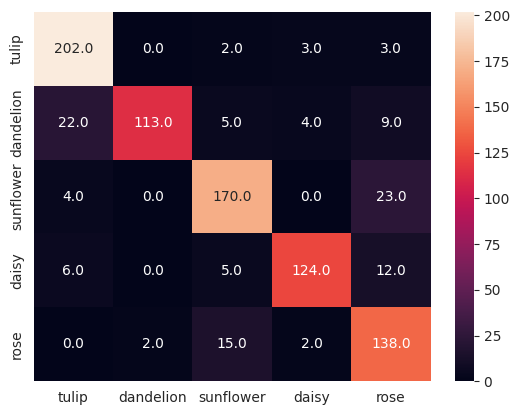

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')

In [51]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test_labels)):
    if(y_test_labels[i] == y_pred_classes[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test_labels)):
    if(y_test_labels[i] != y_pred_classes[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

correctly classified images

In [52]:
y_test_labels

array([2, 4, 0, 1, 3, 1, 0, 1, 4, 0, 0, 0, 1, 2, 0, 0, 4, 2, 0, 2, 2, 0,
       3, 3, 2, 0, 0, 0, 3, 4, 0, 1, 1, 1, 0, 3, 0, 0, 0, 3, 1, 3, 0, 0,
       0, 2, 2, 4, 1, 1, 0, 1, 0, 2, 3, 0, 1, 1, 1, 3, 0, 2, 1, 1, 1, 2,
       0, 2, 4, 3, 3, 4, 1, 0, 0, 3, 3, 2, 1, 3, 0, 2, 2, 0, 0, 0, 3, 0,
       0, 0, 4, 3, 4, 0, 3, 0, 0, 4, 1, 3, 3, 2, 2, 4, 4, 3, 2, 2, 0, 2,
       3, 2, 3, 4, 2, 2, 4, 3, 0, 2, 0, 3, 3, 1, 4, 2, 2, 2, 1, 2, 2, 4,
       1, 3, 0, 0, 2, 1, 0, 3, 0, 0, 0, 0, 2, 3, 0, 0, 4, 0, 1, 4, 0, 0,
       0, 4, 2, 0, 0, 4, 3, 2, 0, 1, 4, 2, 2, 2, 4, 2, 0, 2, 2, 0, 0, 3,
       1, 2, 2, 0, 3, 4, 2, 2, 1, 4, 1, 0, 3, 1, 3, 4, 3, 0, 4, 1, 2, 4,
       0, 2, 4, 4, 4, 1, 1, 4, 1, 0, 2, 2, 1, 2, 2, 3, 4, 3, 3, 2, 2, 0,
       4, 1, 0, 1, 4, 0, 4, 1, 3, 0, 3, 2, 3, 2, 4, 2, 3, 0, 2, 0, 2, 3,
       1, 4, 2, 2, 0, 4, 0, 3, 4, 1, 3, 0, 2, 2, 3, 2, 2, 0, 0, 4, 1, 4,
       2, 3, 3, 0, 3, 0, 1, 0, 3, 1, 2, 4, 0, 0, 2, 0, 3, 4, 1, 0, 3, 3,
       1, 3, 2, 3, 3, 2, 2, 1, 3, 2, 1, 0, 2, 4, 1,

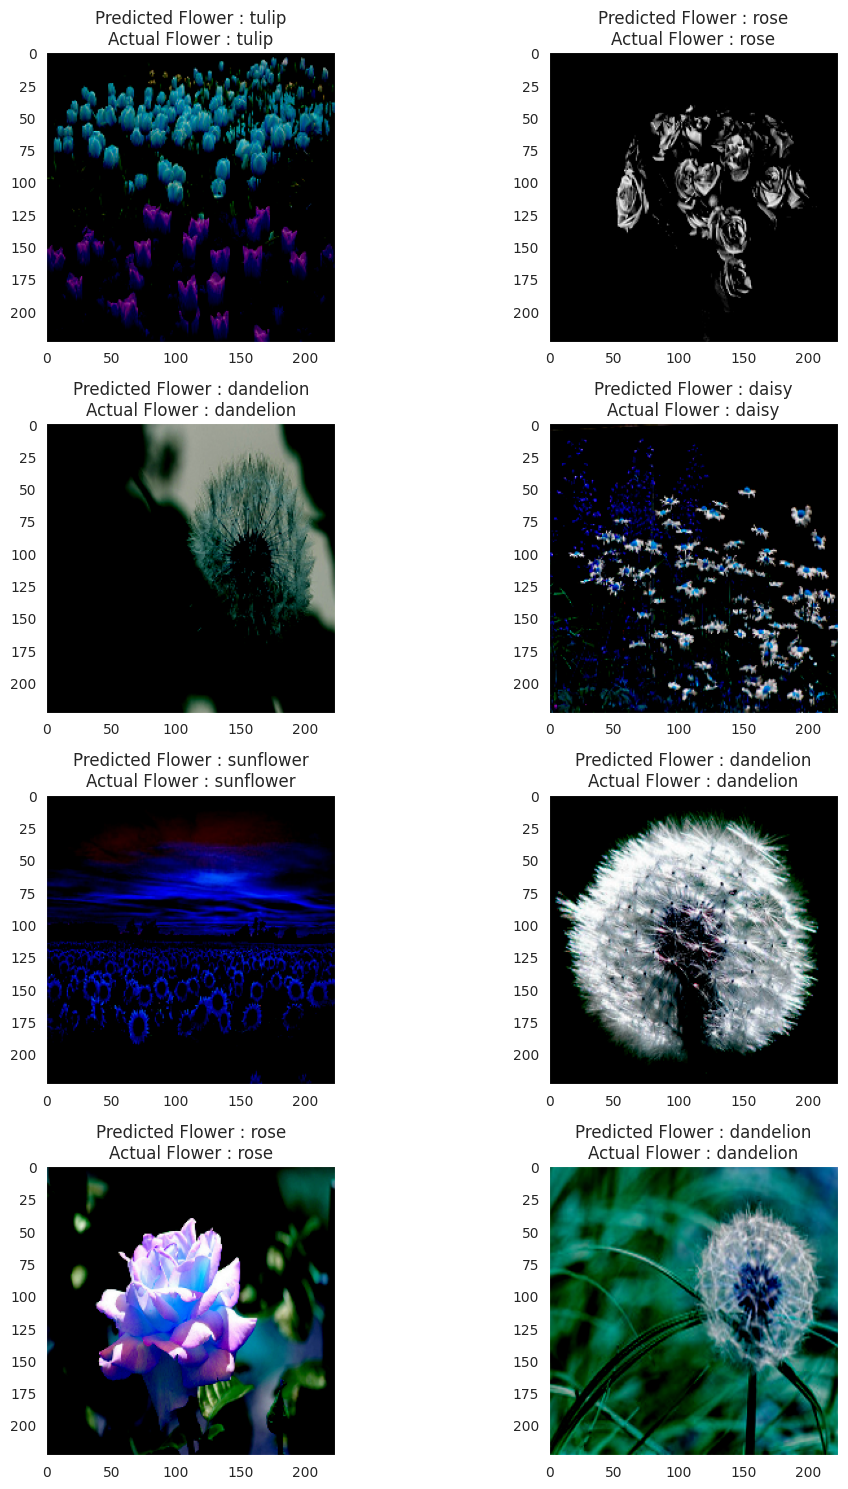

In [53]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ labels[y_pred_classes[prop_class[count]]] +"\n"+"Actual Flower : "+ labels[y_test_labels[prop_class[count]]])
        plt.tight_layout()
        count+=1

mis-classified images

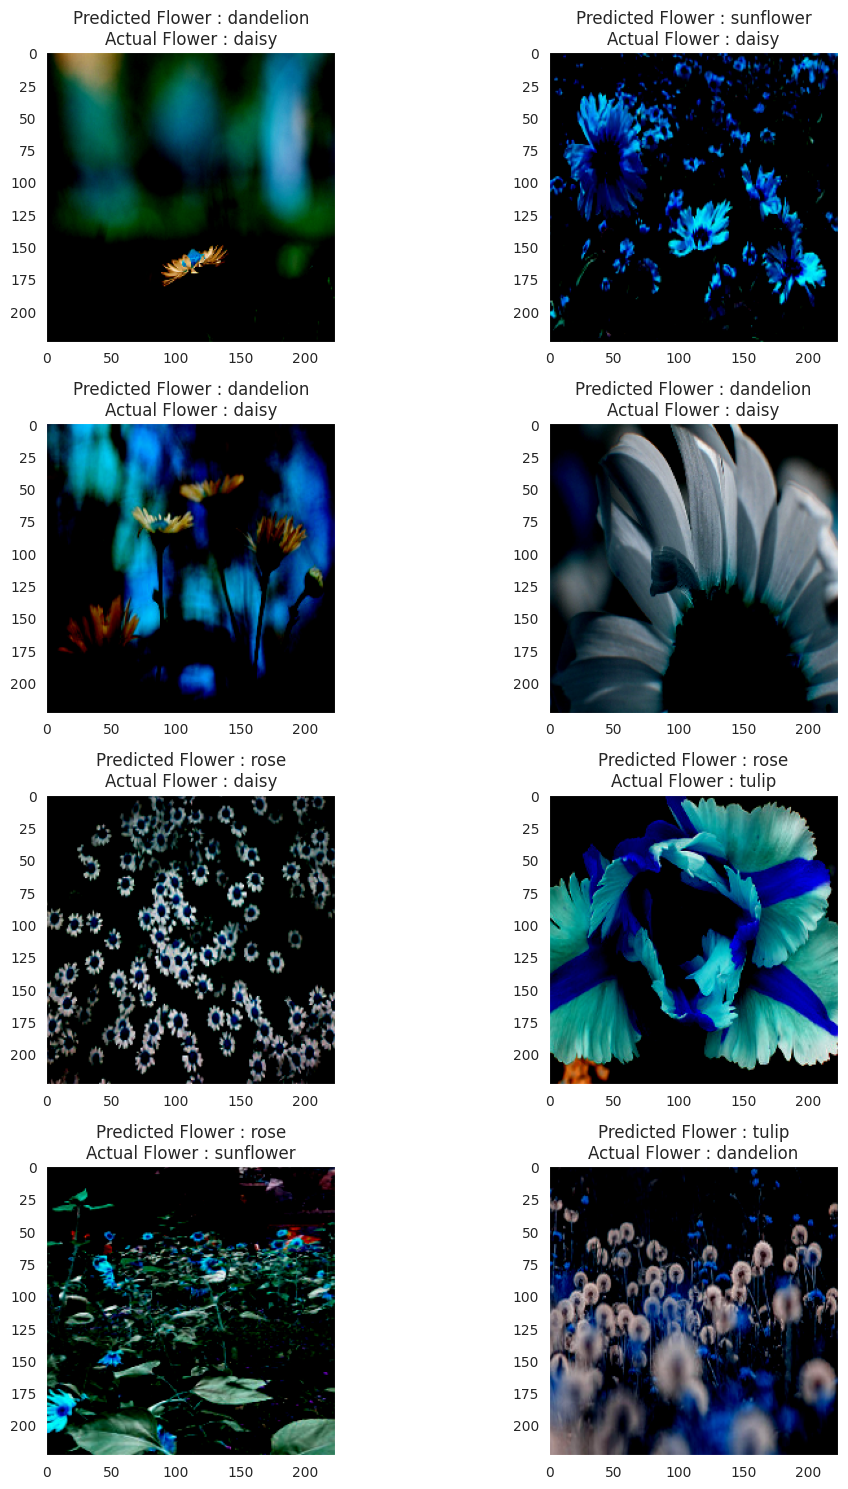

In [54]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+labels[y_pred_classes[mis_class[count]]]+"\n"+"Actual Flower : "+labels[y_test_labels[mis_class[count]]])
        plt.tight_layout()
        count+=1

Now testing on external images

In [60]:
from google.colab import files
files.upload()

Saving 2.jpeg to 2.jpeg


{'2.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe1\x00KExif\x00\x00II*\x00\x08\x00\x00\x00\x02\x00\x0e\x01\x02\x00\x1d\x00\x00\x00&\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00Wild sunflowers on the meadow\xff\xed\x00hPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00K\x1c\x02P\x00\x07m-kojot\x1c\x02x\x00\x1dWild sunflowers on the meadow\x1c\x02n\x00\x18Getty Images/iStockphoto\x00\xff\xe1\x02\xfdhttp://ns.adobe.com/xap/1.0/\x00\t<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n\t\t<rdf:Description rdf:about="" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmlns:Iptc4xmpCore="http://iptc.org/std/Iptc4xmpCore/1.0/xmlns/" xmlns:GettyImagesGIFT="http://xmp.gettyimages.com/gift/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:plus="http://ns.useplus.org/ldf/xmp/1.0/" xmlns:iptcExt="http://iptc.org/std/Iptc4xmpExt/2008-02-29/" photoshop:Credit="Getty Images/iStockphoto" GettyImagesGIFT:Asset

(1, 224, 224, 3)

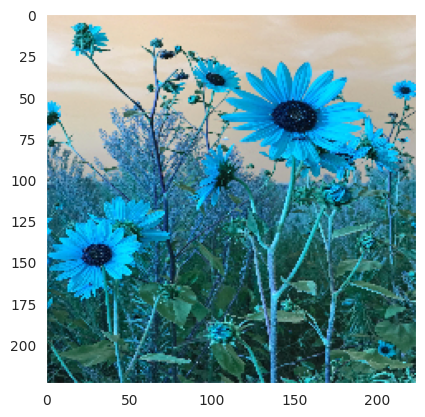

In [61]:
image_name='2.jpeg'   # enter image to test
x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)  #
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
# plt.imshow(x)
# Normalize the data
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

**getting predictions**

1/1 [==============================] - 0s 24ms/step


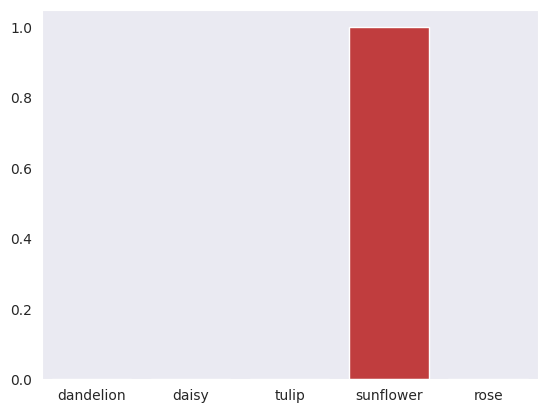

In [62]:
pred=model.predict(x1) # for predicting class
# print(pred)
# prob=model.predict_proba(x1)  # predicting probability
labels_pred=np.argmax(pred,axis=0)
# labels=get_labels(labels_pred)
flowers = ["dandelion","daisy","tulip","sunflower","rose"]
pred_results=pd.DataFrame(data=pred,columns=flowers)
# print(pred_results.head())
import seaborn as sns
# sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
plt.show()
# pred_results.head()